## Building crystal structures
---

Building larger structures is a necessary first step to any ab initio study. The building part may be quite complicated and/or tedious. Fortunately there is a number of tools provided in the ASE `ase.build` library making this job easier. There is a number of functions dedicated to different structures. In this example we will go over few of them:

* simple bulk crystals (`bulk`)
* common molecules (`molecule`, `ase.data.pubchem`, other database functions)
* surfaces (fcc, bcc, hcp, diamond, `surface`)
* 1D structures (`nanotube`, `graphene_nanoribbon`)
* clusters and nanoparticles (`ase.clusters`)
* general crystal builders (`ase.spacegroup.crystal`)
* structural transformation tools (`cut`, `stack`, `rotate`, `make_supercell`, etc.)

These are just a sample of basic tools. There are other tools dedicated to  multiple tasks from various fields of computational solid state physics and chemistry Visualization, DFT, Vibration analysis, Phonons, Reaction kinematics, Thermochemistry and many others). The detailed documentation is at [ASE documentation site](https://wiki.fysik.dtu.dk/ase/index.html).

### Simple crystal

Let us build a simple monoatomic crystal (Diamond) using the pre-cooked structure. We will also make a picture of the structure.

In [1]:
%pylab inline
from ase.build import bulk
from ase.spacegroup import crystal
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.dft import bz, kpoints

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
diamond = bulk('C', crystalstructure='diamond', a=3.567)

In [3]:
v = view(diamond, viewer='ngl')
v

In [4]:
v.view.remove_spacefill()
v.view.add_ball_and_stick()

### Other structures
If you want a more interesting crystal we can try different structures and atomic contents.

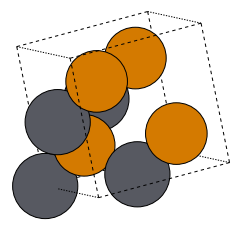

In [5]:
PbTe = bulk('PbTe', crystalstructure='zincblende', a=6.46, cubic=True)
ax = plot_atoms(PbTe, rotation='10x,20y,15z')
ax.set_axis_off()

In [6]:
view(PbTe, viewer='ngl')

In [7]:
_.view.remove_spacefill()
_.view.add_ball_and_stick()

### Direct specification of symmetry

In [8]:
a = 4.6
c = 2.95
rutile =crystal(['Ti', 'O'], 
                basis=[(0, 0, 0), (0.3, 0.3, 0.0)],
                spacegroup=136, 
                cellpar=[a, a, c, 90, 90, 90])

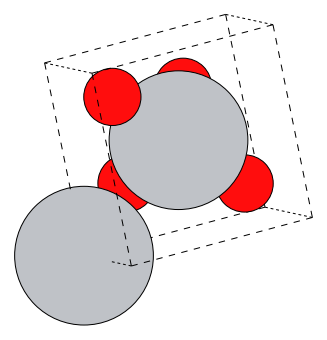

In [9]:
figsize(6,6)
ax = plot_atoms(rutile, rotation='10x,20y,15z')
ax.set_axis_off()

In [10]:
a = 9.04
skutterudite = crystal(('Co', 'Sb'),
                       basis=[(0.25, 0.25, 0.25), (0.0, 0.335, 0.158)],
                       spacegroup=204,
                       cellpar=[a, a, a, 90, 90, 90])

In [11]:
view(skutterudite, viewer='ngl')

In [12]:
a = 8.39
magnetite = crystal("Fe2O", basis=[(1/8, 1/8, 1/8), (1/2,1/2,1/2), 
                                   (0.2548, 0.2548, 0.2548)],
                    spacegroup="Fd-3m", setting=2, cellpar=(a, a, a, 90, 90, 90))

In [13]:
view(magnetite, viewer='ngl')

In [14]:
_.view.remove_spacefill()
_.view.add_ball_and_stick()

## Reciprocal space

Reciprocal space is fairly difficult to visualize without any help. ASE provides a number of small tools to help in this task. They help in generating paths and grids in the reciprocal space as well as help in showing the graphical representation of the Brillouin zone and reciprocal space structures.

### Brillouin zone

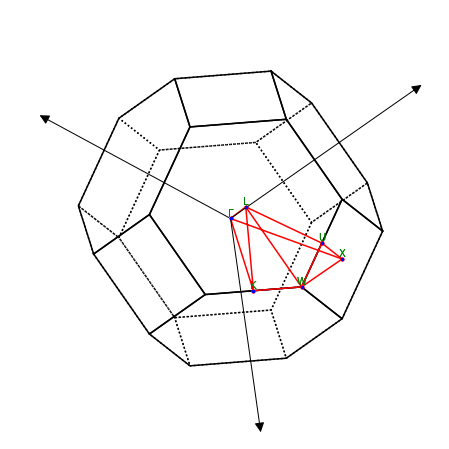

In [15]:
figsize(8,8)
diamond.cell.get_bravais_lattice().plot_bz();

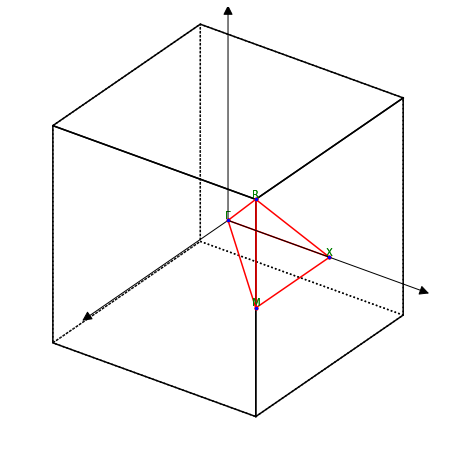

In [16]:
PbTe.cell.get_bravais_lattice().plot_bz();

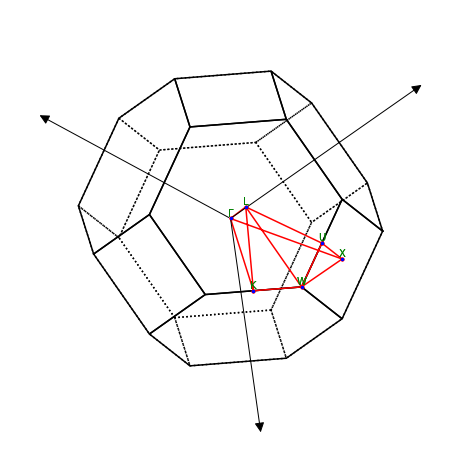

In [17]:
bulk('PbTe', crystalstructure='zincblende', a=6.46, cubic=False).cell.get_bravais_lattice().plot_bz();

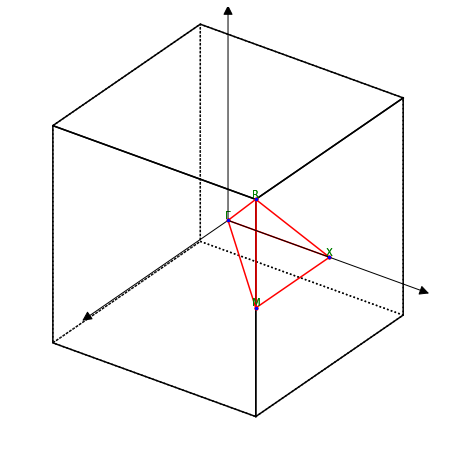

In [18]:
cubic_diamond = bulk('C', crystalstructure='diamond', a=3.567, cubic=True)
cubic_diamond.cell.get_bravais_lattice().plot_bz();

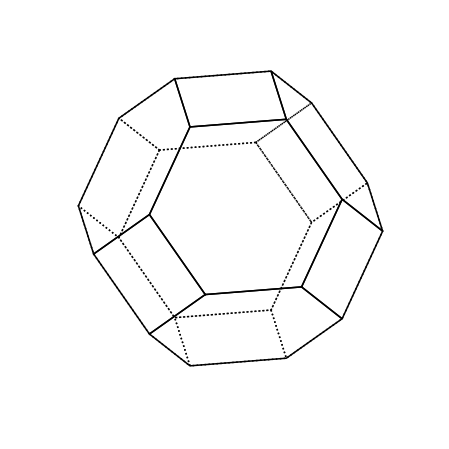

In [19]:
bz.bz_plot(cubic_diamond.cell);
bz.bz_plot(diamond.cell);

### Sampling grids and paths

In [20]:
kpoints.get_special_points(diamond.cell)

{'G': array([0., 0., 0.]),
 'K': array([0.375, 0.375, 0.75 ]),
 'L': array([0.5, 0.5, 0.5]),
 'U': array([0.625, 0.25 , 0.625]),
 'W': array([0.5 , 0.25, 0.75]),
 'X': array([0.5, 0. , 0.5])}

In [21]:
lat = diamond.cell.get_bravais_lattice()

In [22]:
lat.special_point_names

['G', 'K', 'L', 'U', 'W', 'X']

In [23]:
print(lat.description())

FCC(a=3.567)
  Variant name: FCC
  Special point names: GKLUWX
  Default path: GXWKGLUWLK,UX

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    K   0.3750  0.3750  0.7500
    L   0.5000  0.5000  0.5000
    U   0.6250  0.2500  0.6250
    W   0.5000  0.2500  0.7500
    X   0.5000  0.0000  0.5000



In [24]:
kpoints.monkhorst_pack([3,3,3])

array([[-0.33333333, -0.33333333, -0.33333333],
       [-0.33333333, -0.33333333,  0.        ],
       [-0.33333333, -0.33333333,  0.33333333],
       [-0.33333333,  0.        , -0.33333333],
       [-0.33333333,  0.        ,  0.        ],
       [-0.33333333,  0.        ,  0.33333333],
       [-0.33333333,  0.33333333, -0.33333333],
       [-0.33333333,  0.33333333,  0.        ],
       [-0.33333333,  0.33333333,  0.33333333],
       [ 0.        , -0.33333333, -0.33333333],
       [ 0.        , -0.33333333,  0.        ],
       [ 0.        , -0.33333333,  0.33333333],
       [ 0.        ,  0.        , -0.33333333],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.33333333],
       [ 0.        ,  0.33333333, -0.33333333],
       [ 0.        ,  0.33333333,  0.        ],
       [ 0.        ,  0.33333333,  0.33333333],
       [ 0.33333333, -0.33333333, -0.33333333],
       [ 0.33333333, -0.33333333,  0.        ],
       [ 0.33333333, -0.33333333,  0.333